In [159]:
from collections import defaultdict
import json
import csv

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl
import pylab

from sklearn import datasets, linear_model, neighbors
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors.kde import KernelDensity
from sklearn.svm import SVR 
from sklearn.model_selection import train_test_split
from sklearn import metrics

from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

import os

import itertools

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [ ]:
"""
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered
"""

In [ ]:
"""https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset"""

In [160]:
import random
import copy

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import brewer2mpl
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
dark2_colors = dark2_cmap.mpl_colors

import warnings
warnings.filterwarnings('ignore', message='Polyfit*')

def scatter_by(df, scatterx, scattery, by=None, figure=None, axes=None, colorscale=dark2_cmap, labeler={}, mfunc=None, setupfunc=None, mms=8):
    cs=copy.deepcopy(colorscale.mpl_colors)
    if not figure:
        figure=plt.figure(figsize=(8,8))
    if not axes:
        axes=figure.gca()
    x=df[scatterx]
    y=df[scattery]
    if not by:
        col=random.choice(cs)
        axes.scatter(x, y, cmap=colorscale, c=col)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            mfunc(axeslist,x,y,color=col, mms=mms)
    else:
        cs=list(np.linspace(0,1,len(df.groupby(by))))
        xlimsd={}
        ylimsd={}
        xs={}
        ys={}
        cold={}
        for k,g in df.groupby(by):
            col=cs.pop()
            x=g[scatterx]
            y=g[scattery]
            xs[k]=x
            ys[k]=y
            c=colorscale.mpl_colormap(col)
            cold[k]=c
            axes.scatter(x, y, c=c, label=labeler.get(k,k), s=40, alpha=0.2);
            xlimsd[k]=axes.get_xlim()
            ylimsd[k]=axes.get_ylim()
        xlims=[min([xlimsd[k][0] for k in xlimsd.keys()]), max([xlimsd[k][1] for k in xlimsd.keys()])]
        ylims=[min([ylimsd[k][0] for k in ylimsd.keys()]), max([ylimsd[k][1] for k in ylimsd.keys()])]
        axes.set_xlim(xlims)
        axes.set_ylim(ylims)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            for k in xs.keys():
                mfunc(axeslist,xs[k],ys[k],color=cold[k], mms=mms);
    axes.set_xlabel(scatterx);
    axes.set_ylabel(scattery);
    
    return axes

def make_rug(axeslist, x, y, color='b', mms=8):
    axes=axeslist[0]
    zerosx1=np.zeros(len(x))
    zerosx2=np.zeros(len(x))
    xlims=axes.get_xlim()
    ylims=axes.get_ylim()
    zerosx1.fill(ylims[1])
    zerosx2.fill(xlims[1])
    axes.plot(x, zerosx1, marker='|', color=color, ms=mms)
    axes.plot(zerosx2, y, marker='_', color=color, ms=mms)
    axes.set_xlim(xlims)
    axes.set_ylim(ylims)
    return axes

In [161]:
df=pd.read_csv("hour.csv")

df.head(7)

instant    dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  Start  End  Duration
0        1  1/1/2011       1   0     1   0        0        6           0           1  0.24  0.2879  0.81     0.0000       3          13   16    NaN  NaN       NaN
1        2  1/1/2011       1   0     1   1        0        6           0           1  0.22  0.2727  0.80     0.0000       8          32   40    NaN  NaN       NaN
2        3  1/1/2011       1   0     1   2        0        6           0           1  0.22  0.2727  0.80     0.0000       5          27   32    NaN  NaN       NaN
3        4  1/1/2011       1   0     1   3        0        6           0           1  0.24  0.2879  0.75     0.0000       3          10   13    NaN  NaN       NaN
4        5  1/1/2011       1   0     1   4        0        6           0           1  0.24  0.2879  0.75     0.0000       0           1    1    NaN  NaN       NaN
5        6  1/1/2011       1   0     1   5        0        6           0           2  0.24  0.2576  0.75     0.0896       0           1    1    NaN  NaN       NaN
6        7  1/1/2011       1   0     1   6        0        6           0           1  0.22  0.2727  0.80     0.0000       2           0    2    NaN  NaN       NaN

In [162]:
df['Date'] = pd.to_datetime(df['dteday'], errors='coerce')

df['yr'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

print("Number of columns: {}".format(len(df.columns)))
print("Number of rows: {}".format(len(df.index)))

Number of columns: 22
Number of rows: 17379


In [5]:
df.describe()

instant        season            yr          mnth            hr       holiday       weekday    workingday    weathersit          temp         atemp           hum     windspeed        casual    registered           cnt  Start  End  Duration         month
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000    0.0  0.0       0.0  17379.000000
mean    8690.0000      2.501640   2011.502561      6.537775     11.546752      0.028770      3.003683      0.682721      1.425283      0.496987      0.475775      0.627229      0.190098     35.676218    153.786869    189.463088    NaN  NaN       NaN      6.537775
std     5017.0295      1.106918      0.500008      3.438776      6.914405      0.167165      2.005771      0.465431      0.639357      0.192556      0.171850      0.192930      0.122340     49.305030    151.357286    181.387599    NaN  NaN       NaN      3.438776
min        1.0000      1.000000   2011.000000      1.000000      0.000000      0.000000      0.000000      0.000000      1.000000      0.020000      0.000000      0.000000      0.000000      0.000000      0.000000      1.000000    NaN  NaN       NaN      1.000000
25%     4345.5000      2.000000   2011.000000      4.000000      6.000000      0.000000      1.000000      0.000000      1.000000      0.340000      0.333300      0.480000      0.104500      4.000000     34.000000     40.000000    NaN  NaN       NaN      4.000000
50%     8690.0000      3.000000   2012.000000      7.000000     12.000000      0.000000      3.000000      1.000000      1.000000      0.500000      0.484800      0.630000      0.194000     17.000000    115.000000    142.000000    NaN  NaN       NaN      7.000000
75%    13034.5000      3.000000   2012.000000     10.000000     18.000000      0.000000      5.000000      1.000000      2.000000      0.660000      0.621200      0.780000      0.253700     48.000000    220.000000    281.000000    NaN  NaN       NaN     10.000000
max    17379.0000      4.000000   2012.000000     12.000000     23.000000      1.000000      6.000000      1.000000      4.000000      1.000000      1.000000      1.000000      0.850700    367.000000    886.000000    977.000000    NaN  NaN       NaN     12.000000

In [163]:
# If year is 2012, then new month equals to old month plus 12, then replace NaNs with old months:
df["month_all"] = df["month"][df["yr"] == 2012] + 12
df["month_all"].fillna(df["month"], inplace = True)

In [164]:
# Drop variables: 
df.drop(['Start'], axis=1, inplace = True)
df.drop(['mnth'], axis=1, inplace = True)
df.drop(['End'], axis=1, inplace = True)
df.drop(['Duration'], axis=1, inplace = True)
df.drop(['dteday'], axis=1, inplace = True)
df.drop(['Date'], axis=1, inplace = True)
df.drop(['month'], axis=1, inplace = True)
df.drop(['casual'], axis=1, inplace = True)
df.drop(['registered'], axis=1, inplace = True)
df.drop(['instant'], axis=1, inplace = True)

df.head(7)

season    yr  hr  holiday  weekday  workingday  weathersit  temp   atemp   hum  windspeed  cnt  month_all
0       1  2011   0        0        6           0           1  0.24  0.2879  0.81     0.0000   16        1.0
1       1  2011   1        0        6           0           1  0.22  0.2727  0.80     0.0000   40        1.0
2       1  2011   2        0        6           0           1  0.22  0.2727  0.80     0.0000   32        1.0
3       1  2011   3        0        6           0           1  0.24  0.2879  0.75     0.0000   13        1.0
4       1  2011   4        0        6           0           1  0.24  0.2879  0.75     0.0000    1        1.0
5       1  2011   5        0        6           0           2  0.24  0.2576  0.75     0.0896    1        1.0
6       1  2011   6        0        6           0           1  0.22  0.2727  0.80     0.0000    2        1.0

In [165]:
df.describe()

season            yr            hr       holiday       weekday    workingday    weathersit          temp         atemp           hum     windspeed           cnt     month_all
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000
mean       2.501640   2011.502561     11.546752      0.028770      3.003683      0.682721      1.425283      0.496987      0.475775      0.627229      0.190098    189.463088     12.568502
std        1.106918      0.500008      6.914405      0.167165      2.005771      0.465431      0.639357      0.192556      0.171850      0.192930      0.122340    181.387599      6.884340
min        1.000000   2011.000000      0.000000      0.000000      0.000000      0.000000      1.000000      0.020000      0.000000      0.000000      0.000000      1.000000      1.000000
25%        2.000000   2011.000000      6.000000      0.000000      1.000000      0.000000      1.000000      0.340000      0.333300      0.480000      0.104500     40.000000      7.000000
50%        3.000000   2012.000000     12.000000      0.000000      3.000000      1.000000      1.000000      0.500000      0.484800      0.630000      0.194000    142.000000     13.000000
75%        3.000000   2012.000000     18.000000      0.000000      5.000000      1.000000      2.000000      0.660000      0.621200      0.780000      0.253700    281.000000     19.000000
max        4.000000   2012.000000     23.000000      1.000000      6.000000      1.000000      4.000000      1.000000      1.000000      1.000000      0.850700    977.000000     24.000000

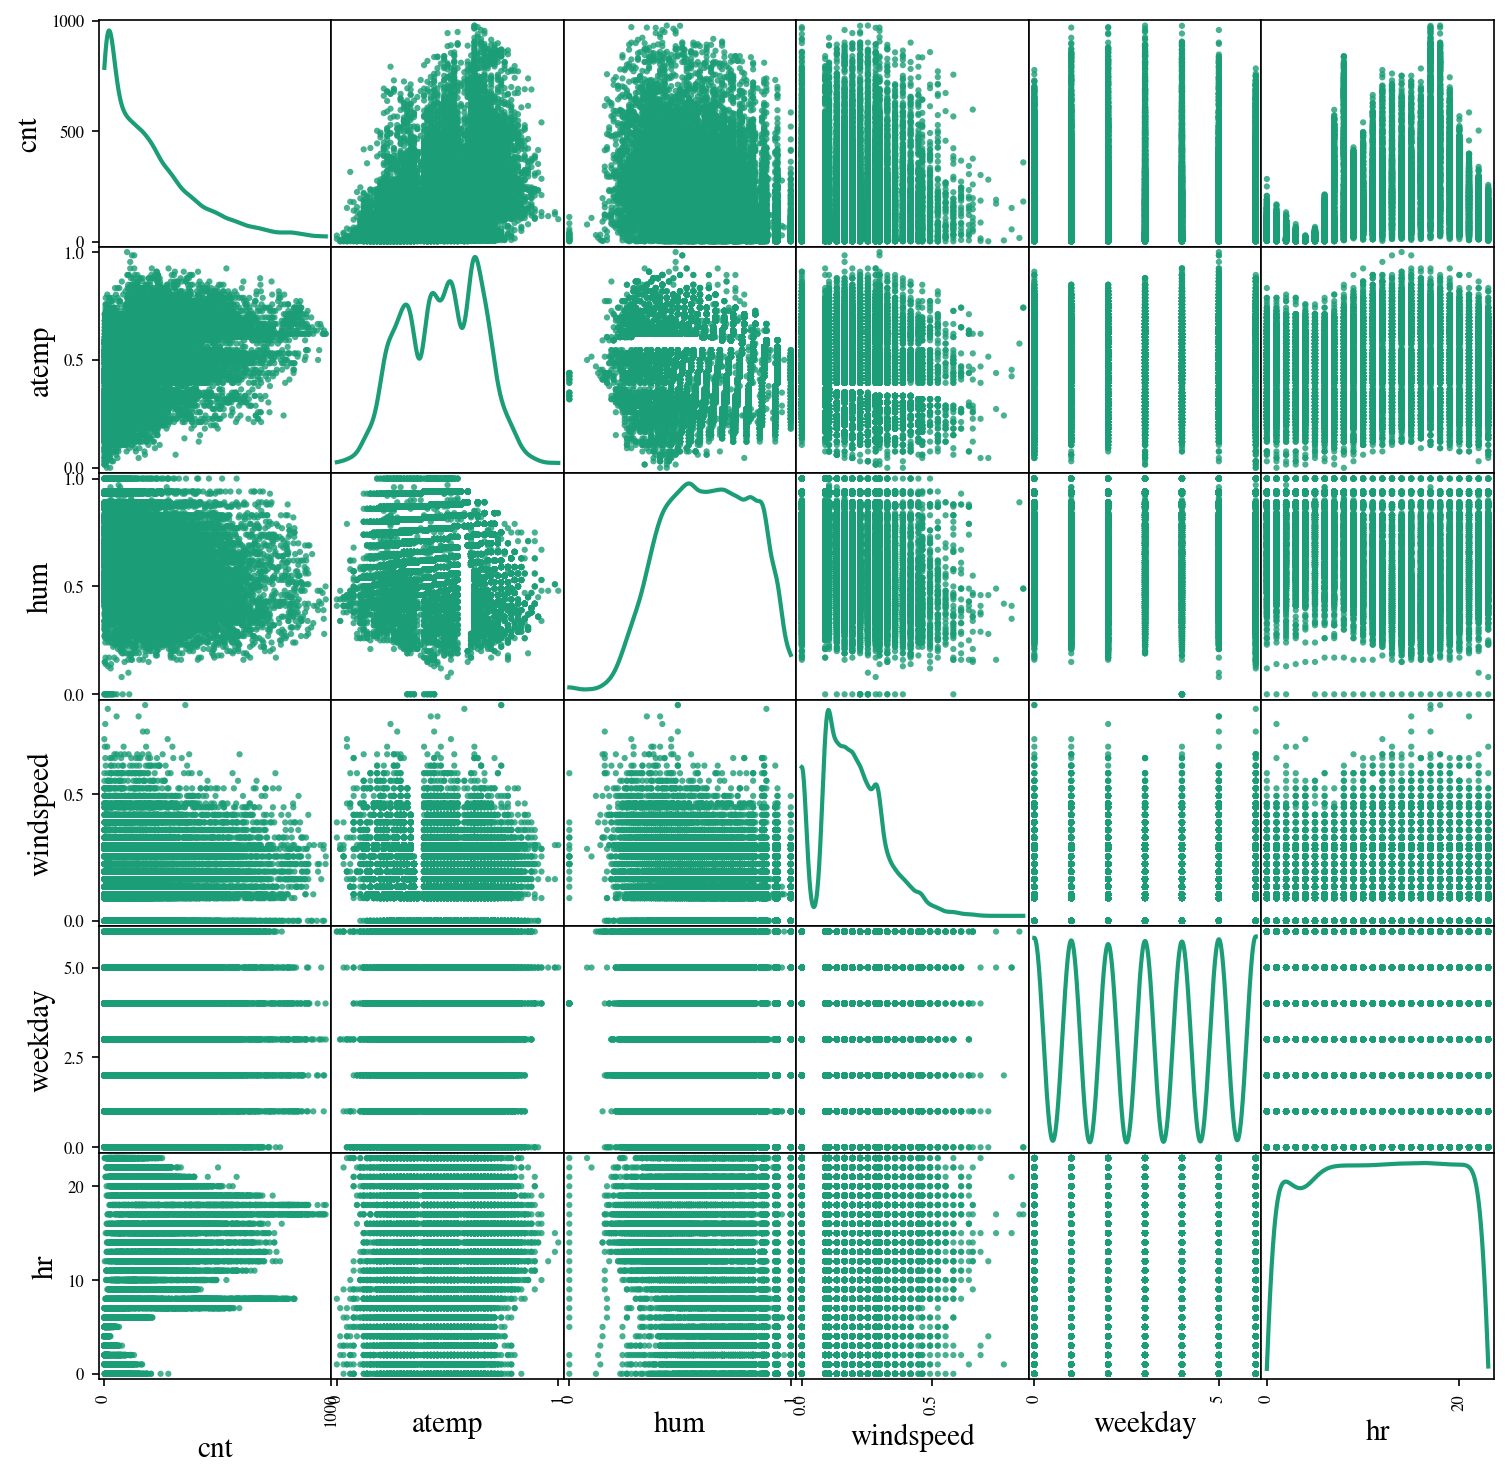

In [166]:
""" Scatter matrix:

"""

smaller_frame=df[['cnt', 'atemp', 'hum', 'windspeed', 'weekday', 'hr']]
from pandas.plotting import scatter_matrix
axeslist=scatter_matrix(smaller_frame, alpha=0.8, figsize=(12, 12), diagonal="kde")
for ax in axeslist.flatten():
    ax.grid(False)

pylab.savefig('Scatter Matrix', dpi = 80, figsize = (20,6))
plt.show()    

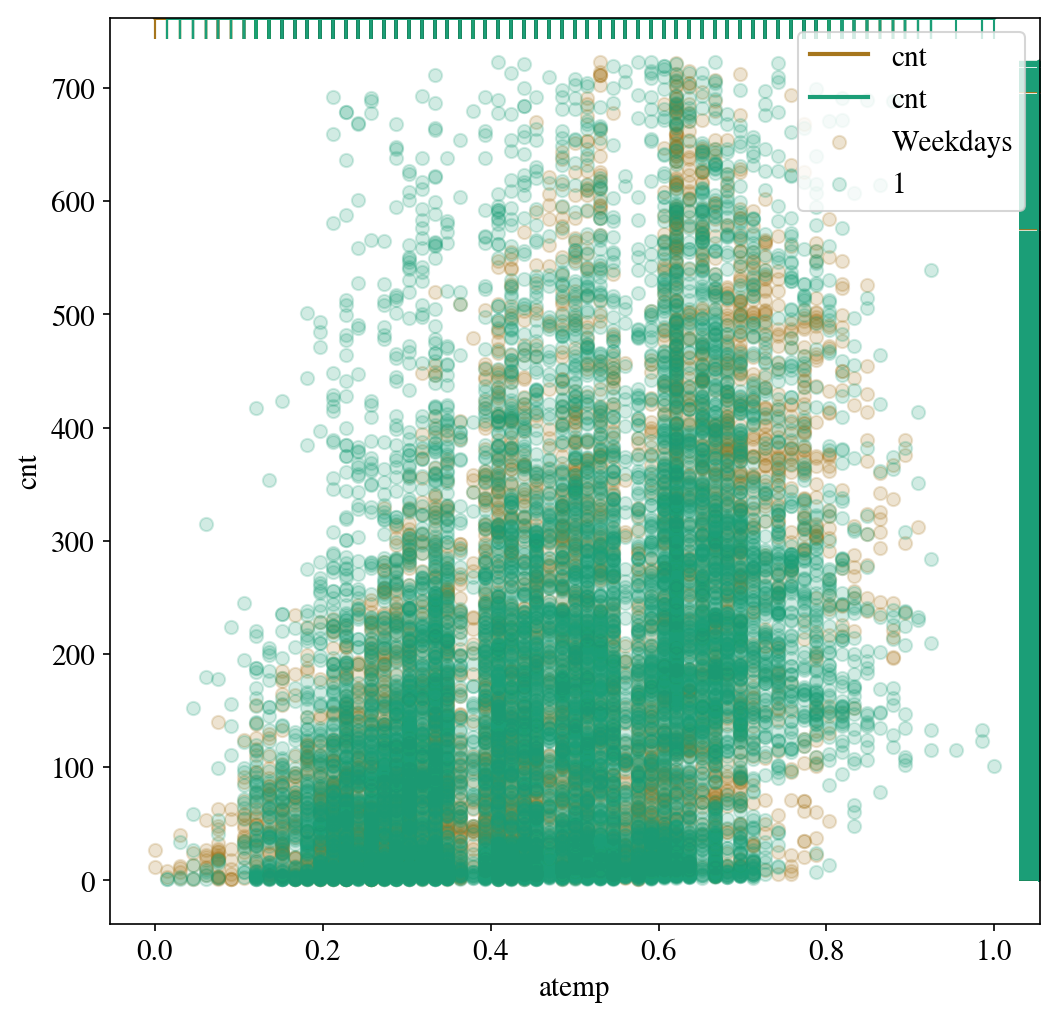

In [172]:
groups = ['Non-weekdays','Weekdays']
amap={e[0]:e[1] for e in zip(df['workingday'],groups)}
ax=scatter_by(df, 'atemp', 'cnt', by='workingday', labeler=amap, mfunc=make_rug, mms=20)
ax.grid(False)
ax.legend(loc='upper right')

pylab.savefig('Cnt ~ Atemp with working day', dpi = 80, figsize = (20,6))
plt.show()

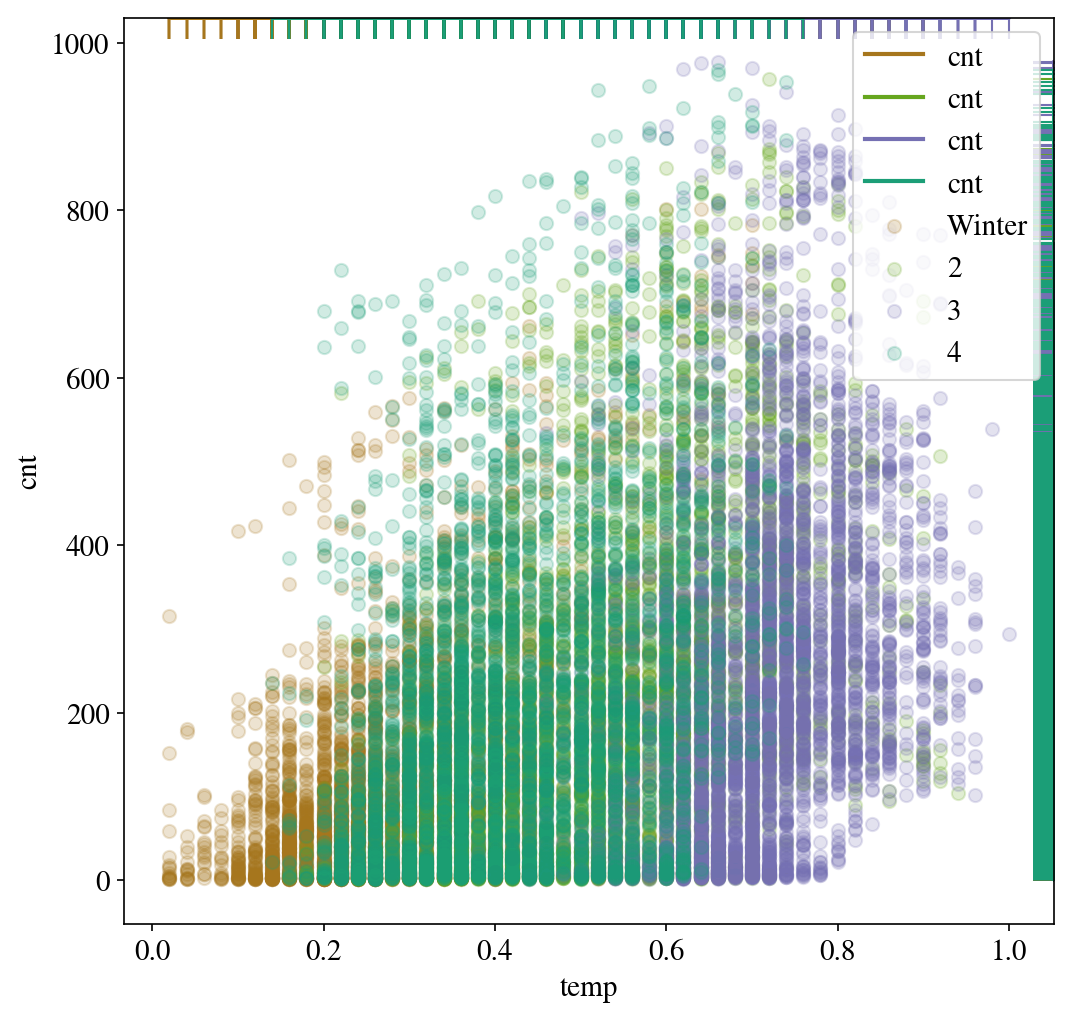

In [21]:
group_2 = ['Fall','Summer', 'Spring', 'Winter']
amap={e[0]:e[1] for e in zip(df['season'],group_2)}
ax=scatter_by(df, 'temp', 'cnt', by='season', labeler=amap, mfunc=make_rug, mms=20)
ax.grid(False)
ax.legend(loc='upper right')

pylab.savefig('Cnt ~ Temp with season', dpi = 80, figsize = (20,6))
plt.show()

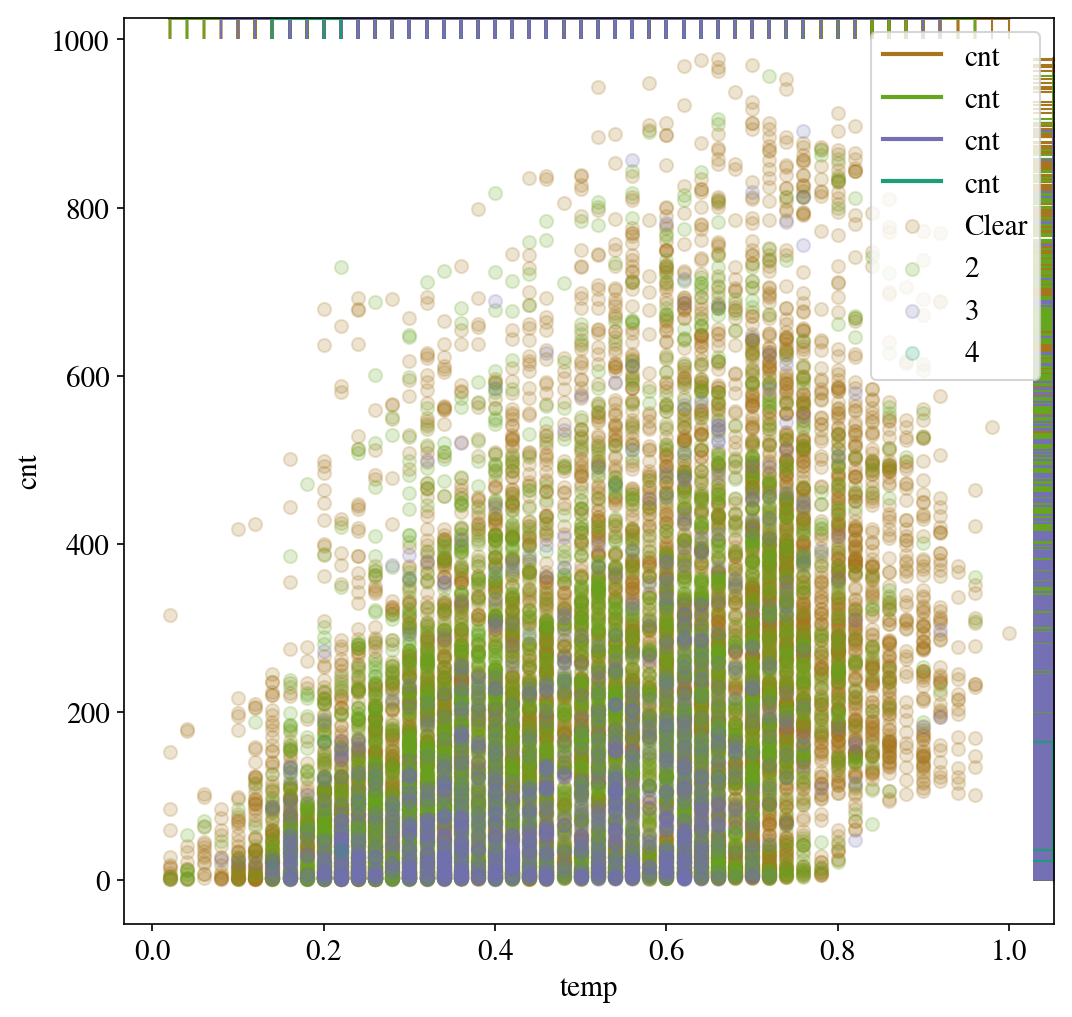

In [22]:
group_2 = ['Heavy','Light', 'Mist', 'Clear']
amap={e[0]:e[1] for e in zip(df['weathersit'],group_2)}
ax=scatter_by(df, 'temp', 'cnt', by='weathersit', labeler=amap, mfunc=make_rug, mms=20)
ax.grid(False)
ax.legend(loc='upper right')

pylab.savefig('Cnt ~ temp with weather situation', dpi = 80, figsize = (20,6))
plt.show()

F


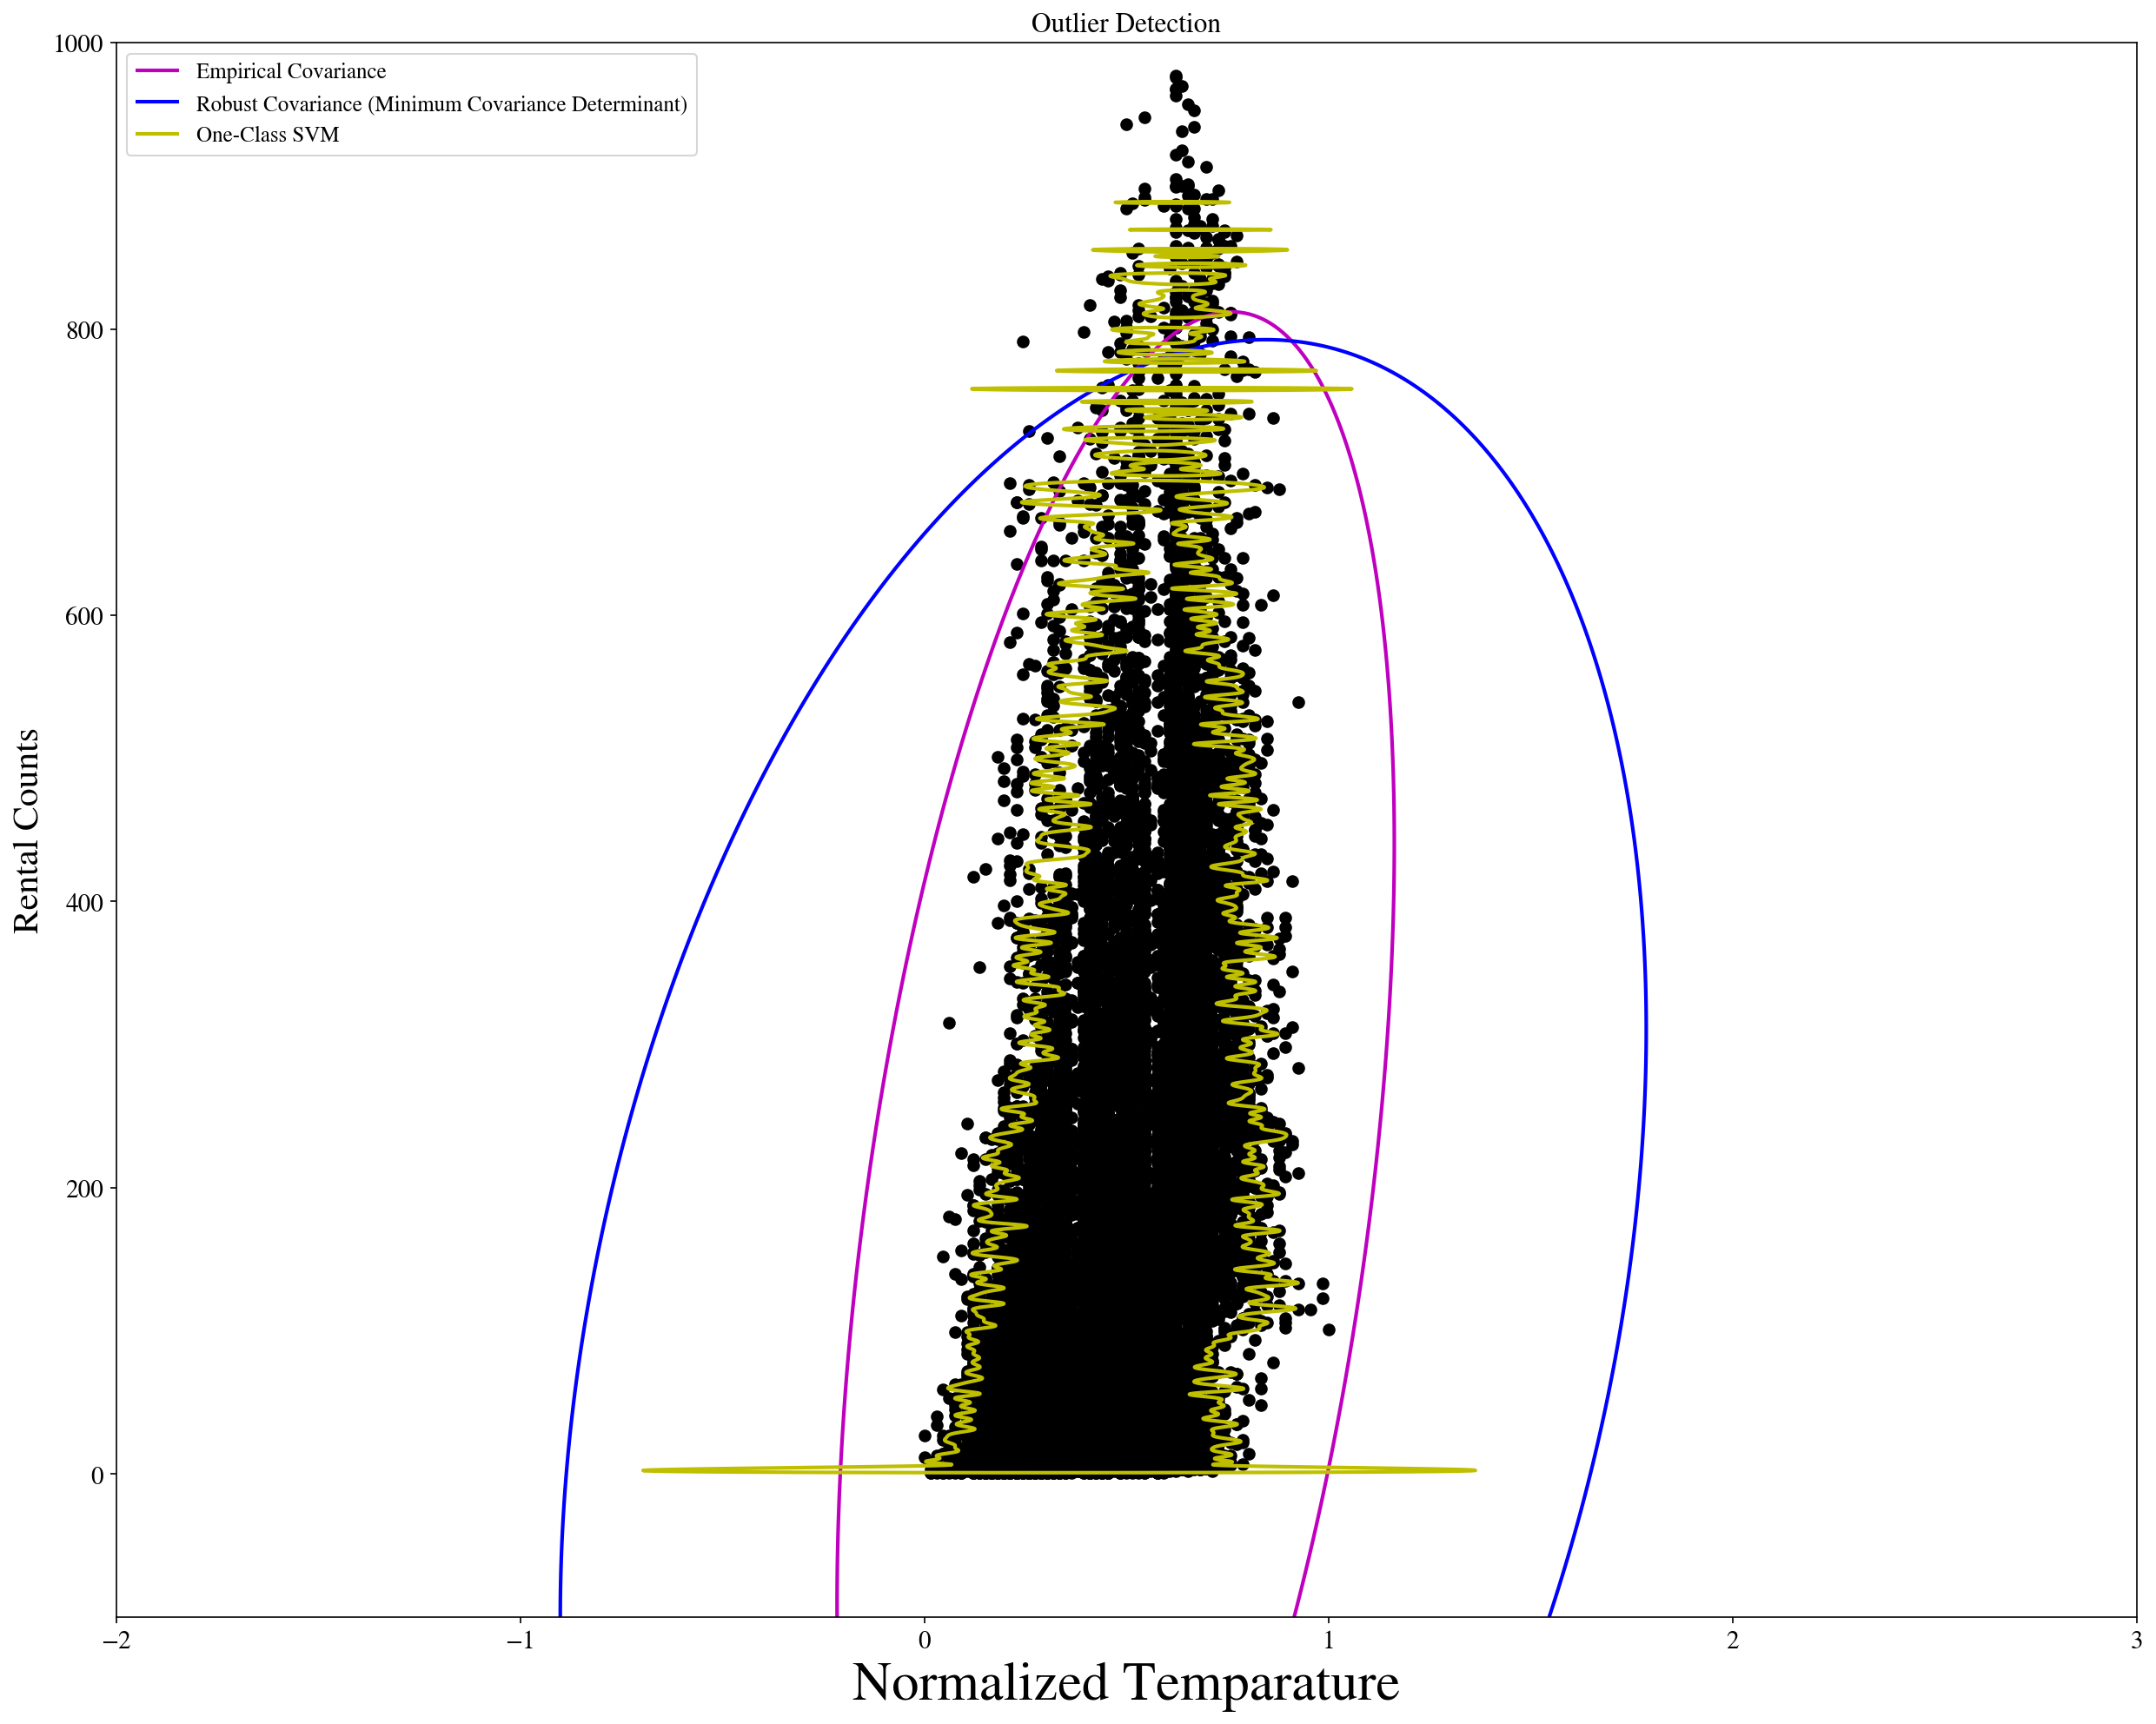

In [13]:
""" Outlier Detection with several methods:

"""

import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_boston
import pylab

# Get data
X = df.as_matrix(columns = ['atemp', 'cnt'])
#X1 = [df["logged_living"], df["logged_price"]]

# Define "classifiers" to be used
classifiers = {"Empirical Covariance": EllipticEnvelope(support_fraction=1.,
                                             contamination=0.01),
               "Robust Covariance (Minimum Covariance Determinant)":
               EllipticEnvelope(contamination = 0.01),
               "One-Class SVM": OneClassSVM(nu=0.05, gamma=0.05)}

# ,"One-Class SVM": OneClassSVM(nu=0.261, gamma=0.05)
colors = ['m', 'b', 'y']
legend1 = {}


# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-100, 1000, 5000))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1, figsize=(20, 16))
    clf.fit(X)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

print("F")

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1, figsize=(20, 16)) 
plt.title("Outlier Detection", fontsize = 15)
plt.scatter(X[:, 0], X[:, 1], color='black')
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0],
            legend1_values_list[2].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=12),  fontsize = 20)

plt.xlabel("Normalized Temparature", fontsize = 30)
plt.ylabel("Rental Counts", fontsize = 20)

#pylab.save("Outlier Detection MCD")
pylab.savefig("Outlier Detection_Emporocal, Roubst, OCSVM")
plt.show()

F


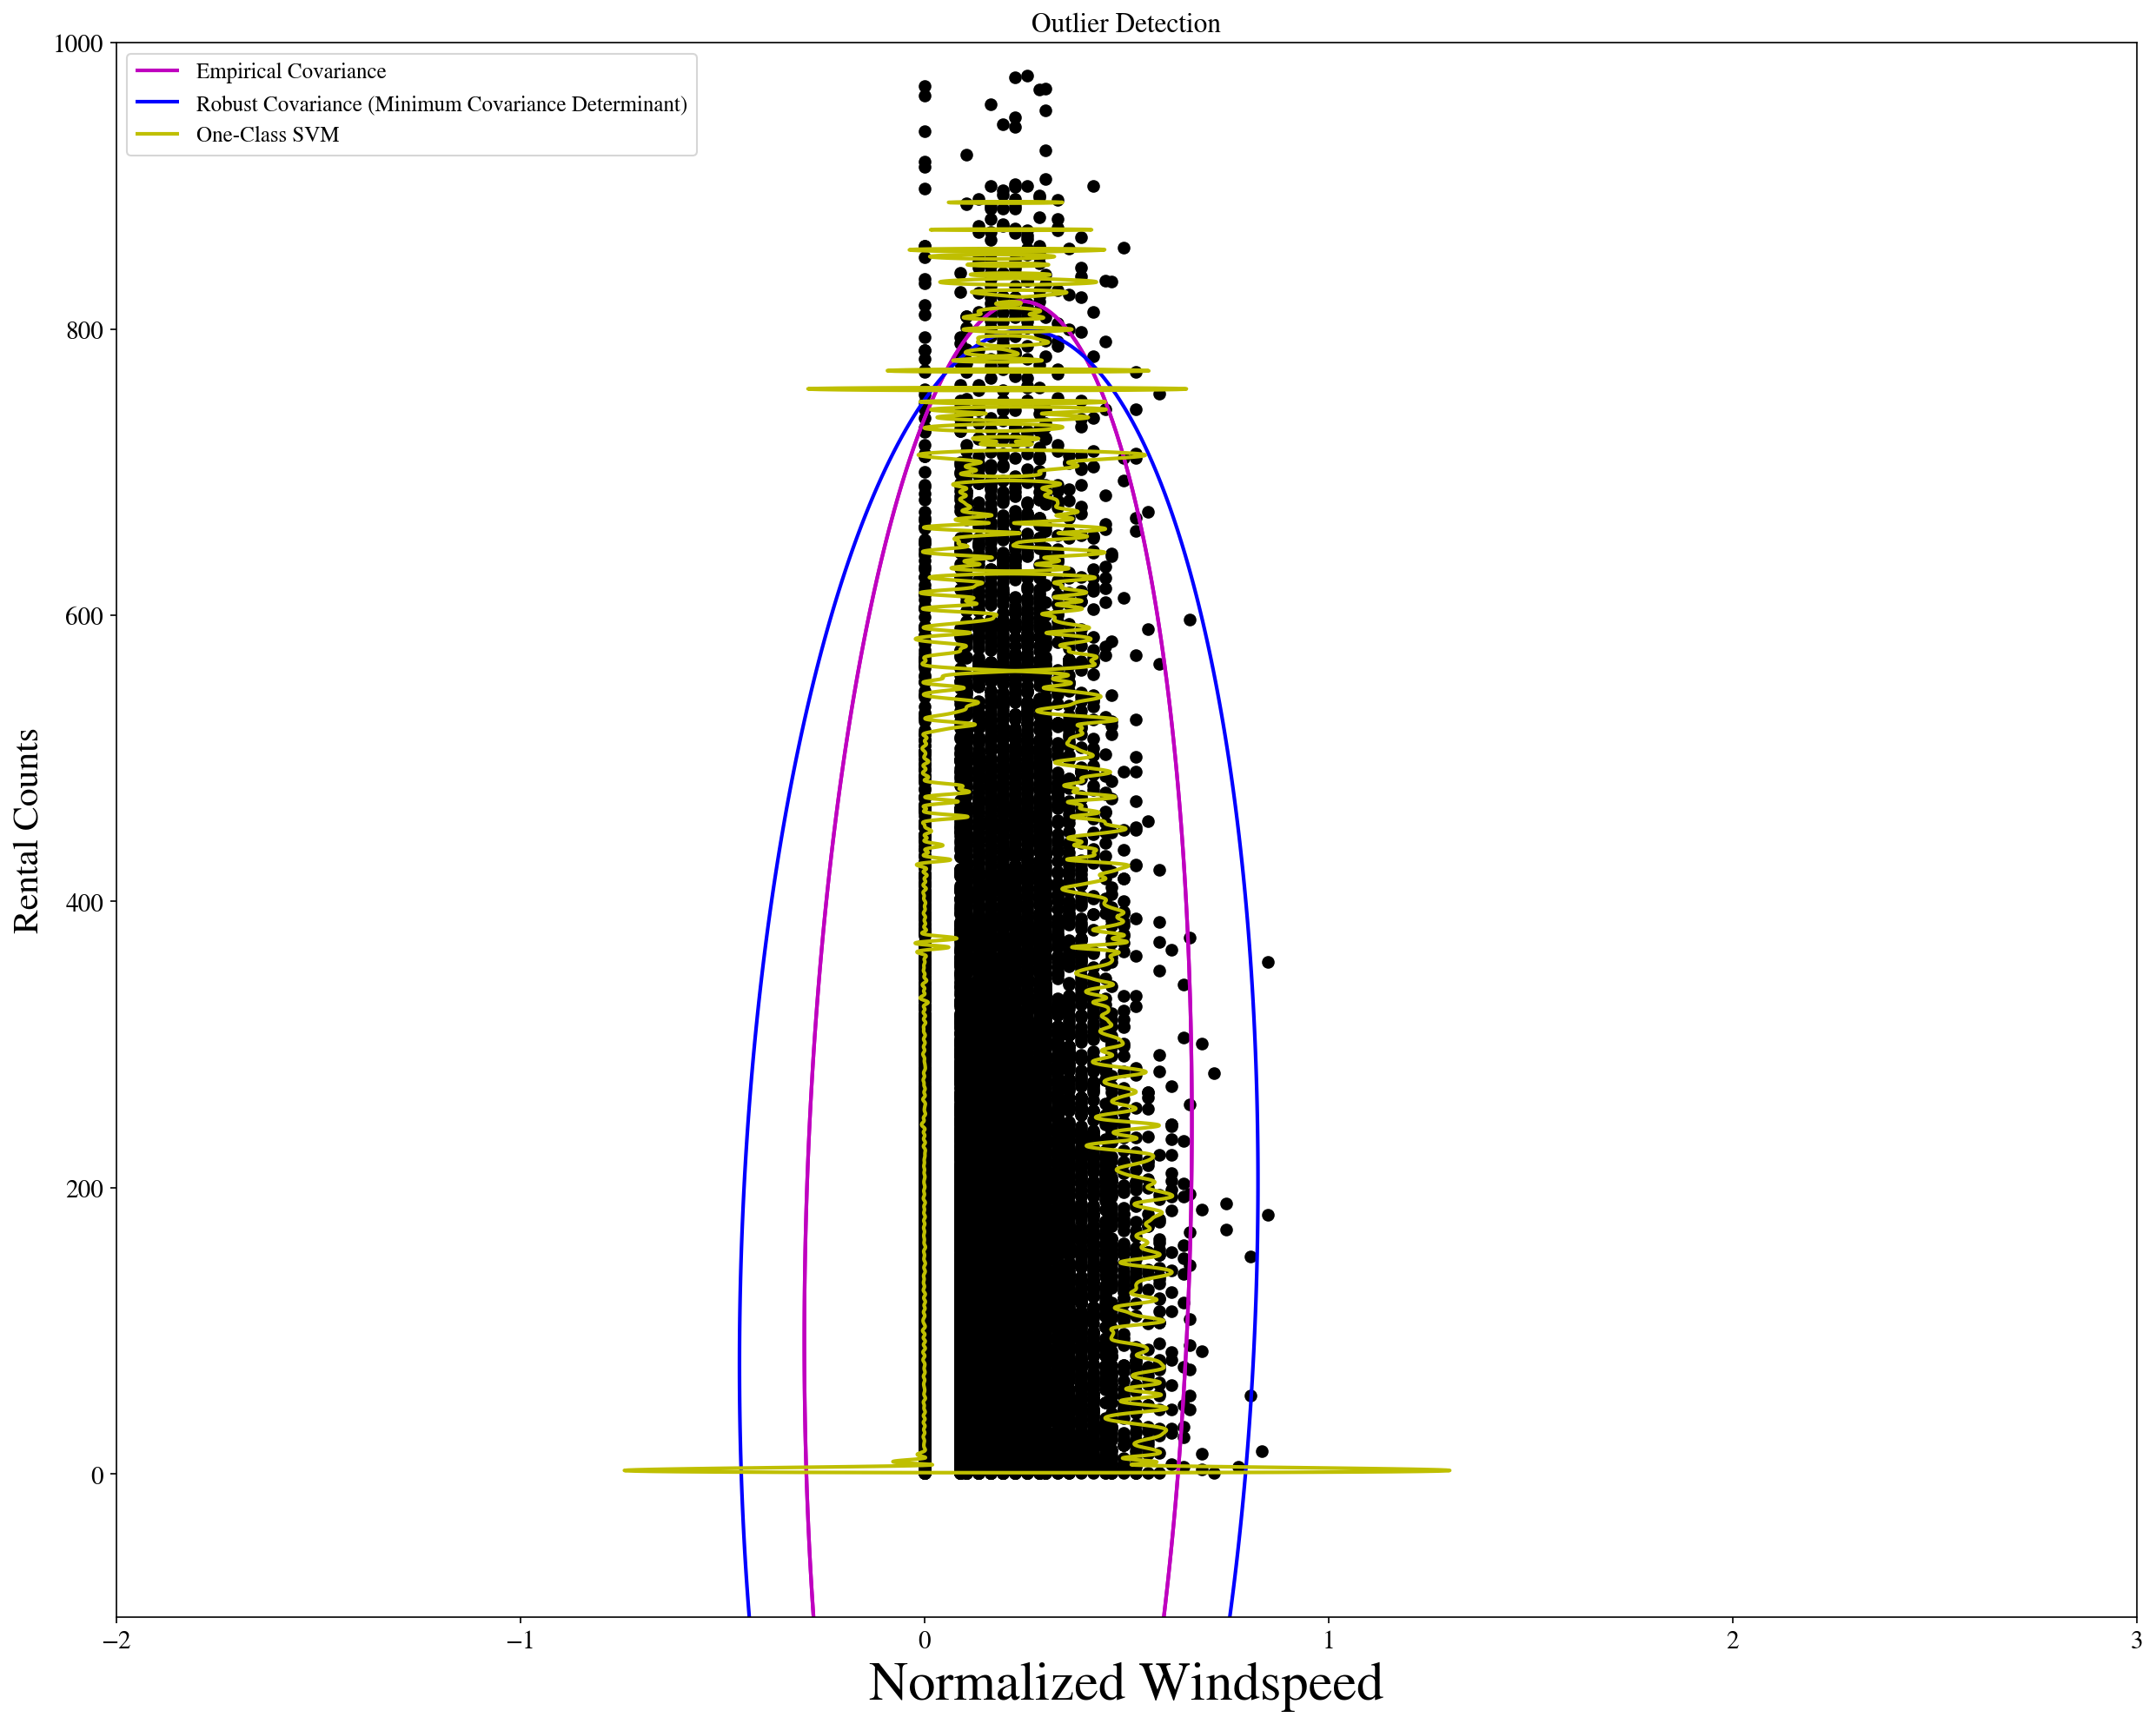

In [15]:
# Get data
X = df.as_matrix(columns = ['windspeed', 'cnt'])
#X1 = [df["logged_living"], df["logged_price"]]

# Define "classifiers" to be used
classifiers = {"Empirical Covariance": EllipticEnvelope(support_fraction=1.,
                                             contamination=0.01),
               "Robust Covariance (Minimum Covariance Determinant)":
               EllipticEnvelope(contamination = 0.01),
               "One-Class SVM": OneClassSVM(nu=0.05, gamma=0.05)}

# ,"One-Class SVM": OneClassSVM(nu=0.261, gamma=0.05)
colors = ['m', 'b', 'y']
legend1 = {}


# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-100, 1000, 5000))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1, figsize=(20, 16))
    clf.fit(X)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

print("F")

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1, figsize=(20, 16)) 
plt.title("Outlier Detection", fontsize = 15)
plt.scatter(X[:, 0], X[:, 1], color='black')
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0],
            legend1_values_list[2].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=12),  fontsize = 20)

plt.xlabel("Normalized Windspeed", fontsize = 30)
plt.ylabel("Rental Counts", fontsize = 20)

#pylab.save("Outlier Detection MCD")
pylab.savefig("Outlier Detection_Emporocal_WindSpeed, Roubst, OCSVM")
plt.show()

In [ ]:
""" Outlier Detection Conclusion: OCSVM is better compared to the others.

However, considering the nature of the dataset, where rental counts can get crazy when certain things happening.
For example, when the Spring/Fall break comes, it might boosted. 

That being said, I need to invstigate every outliers detected. To simplify the process, I defined a new function using MAD to remove the outliers. 

"""

In [16]:
""" Outlier Detection: MAD.

"""

# Define a function for the detection:
def outliers_mad(ys):
    threshold = 3.5

    median_y = np.median(np.array(ys))
    MAD_y = np.median(np.abs(np.array(ys - median_y)))
    df['MAD'] = 0.6745 * (ys - median_y) / MAD_y 
    print(df.columns)



In [8]:
"""Function: 

Test the best-fitted "training Vs testing" ratio AND best kernel model.

"""

def model_selection(lst):
    # Set ratio:
    ratios = [3, 4, 5, 6, 7, 8]
    #3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 
    test_sizes = []

    # Set X and Y
    X = df.as_matrix(columns=lst)
    y = np.array(df["cnt"])
    
    # Set Kernel:
    kernel = ["rbf", "linear"]
    #, "linear"
    for size in ratios:
        test_size = 1/size
        test_sizes.append(test_size)
    
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=20)
        for k in kernel:
            svr = SVR(kernel = k) 
            svr_fit = svr.fit(X_train, y_train) 
            svr_pred = svr.predict(X_train)
            svr_pred_test = svr.predict(X_test) #Here we are simply predicting on our input to visualize the results
            rmse = metrics.mean_squared_error(y_test, svr_pred_test) #mean-squared-error: (sum((Y_actual-Y_predicted)^2)^0.5
            print("Kernel - {}".format(k))
            print("Test data ratio: {} out of 1.".format(np.round(test_size, 2)))
            print("RMSE - {}".format(rmse))
            r2 = metrics.r2_score(y_test, svr_pred_test)
            print("R2 - {}".format(r2))
            print()


In [17]:
"""Function: 

Randomly choose a random number of variables from lst_other, 
and append the variables to the lst_main to make the final list for independent variable. 

"""
# Create a list of independent variables:
lst_main = ["atemp", "weathersit", "workingday", "hr"]
lst_other = ["season", "month_all", "windspeed"]

#["season", "month_all", "windspeed"]

# Create random selected variables lists of a given size:
def models(size):
    lst_select = list(itertools.combinations(lst_other,size))
    print(lst_select)
    print()
    print("Model Selected:")
    print()

    lst_models = []
    for ele in lst_select:
        lst_main = ["atemp", "weathersit", "workingday", "hr"]
        lst_main.extend(ele)
        lst_models.append(lst_main)
        print(lst_main)

    print()
    return lst_models


In [20]:
for lst in models(3):
    print(lst)
    model_selection(lst)

[('season', 'month_all', 'windspeed')]

Model Selected:

['atemp', 'weathersit', 'workingday', 'hr', 'season', 'month_all', 'windspeed']

['atemp', 'weathersit', 'workingday', 'hr', 'season', 'month_all', 'windspeed']
Kernel - rbf
Test data ratio: 0.33 out of 1.
RMSE - 14561.578704733043
R2 - 0.5478164168867504

Kernel - linear
Test data ratio: 0.33 out of 1.
RMSE - 22953.19732808902
R2 - 0.28722982430832256

Kernel - rbf
Test data ratio: 0.25 out of 1.
RMSE - 14009.368736750837
R2 - 0.5675940980785927

Kernel - linear
Test data ratio: 0.25 out of 1.
RMSE - 23207.64458143423
R2 - 0.28368489149826237

Kernel - rbf
Test data ratio: 0.2 out of 1.
RMSE - 13496.470103823356
R2 - 0.577004049363691

Kernel - linear
Test data ratio: 0.2 out of 1.
RMSE - 22915.548321549377
R2 - 0.2817985686583252

Kernel - rbf
Test data ratio: 0.17 out of 1.
RMSE - 13357.525189502714
R2 - 0.5809701178377362

Kernel - linear
Test data ratio: 0.17 out of 1.
RMSE - 22976.37539924134
R2 - 0.27922367807876336

Kerne

In [26]:
lst = ['atemp', 'weathersit', 'workingday', 'hr', 'season', 'month_all', 'windspeed']
X = df.as_matrix(columns=lst)
y = np.array(df["cnt"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=20)

svr = SVR(kernel = "rbf") 
svr_fit = svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_train)
svr_pred_test = svr.predict(X_test) 
rmse = metrics.mean_squared_error(y_test, svr_pred_test)

print("RMSE - {}".format(rmse))
r2 = metrics.r2_score(y_test, svr_pred_test)
print("R2 - {}".format(r2))
print()

RMSE - 13309.076757814213
R2 - 0.5869776067742559



In [18]:
"""Taking out outliers for the selected model:

"""

# Call outliers_mad():
outliers_mad(df["cnt"])

# Drop the outliers
def Nan(df):
    if df['MAD'] > 3.5:
        return None
    else:
        return df['MAD']

# create sex_new 
df['MAD_Drop']=df.apply(Nan,axis=1)
print(df['MAD_Drop'].isnull().any())
#df['MAD_Drop'].head(12)
df.dropna(subset = ['MAD_Drop'], inplace = True)
print(df.shape)

Index(['instant', 'season', 'yr', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'month', 'month_all', 'MAD'], dtype='object')
True
(17112, 19)


In [19]:
""" Results after the outliers been taken out:

"""

lst = ['atemp', 'weathersit', 'workingday', 'hr', 'season', 'month_all', 'windspeed']
X = df.as_matrix(columns=lst)
y = np.array(df["cnt"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=20)

svr = SVR(kernel = "rbf") 
svr_fit = svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_train)
svr_pred_test = svr.predict(X_test) 
rmse = metrics.mean_squared_error(y_test, svr_pred_test)

print("RMSE - {}".format(rmse))
r2 = metrics.r2_score(y_test, svr_pred_test)
print("R2 - {}".format(r2))
print()

RMSE - 11431.536531361566
R2 - 0.5830261497433653



In [26]:
""" Grid Search for best fit: 

"cnt" ~  ['atemp', 'weathersit', 'workingday', 'hr', 'season', 'month_all', 'windspeed']

"""

from sklearn import svm
from sklearn.model_selection import GridSearchCV

lst = ['atemp', 'weathersit', 'workingday', 'hr', 'season', 'month_all', 'windspeed']
X = df.as_matrix(columns=lst)
y = np.array(df["cnt"])

parameters = {'kernel':['rbf'], 'C':[1, 10], 'gamma': [0.14, 0.1]}
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(X, y)
print(clf.best_score_)
print(clf.get_params)
print(clf.best_estimator_)

0.27962055871
<bound method BaseEstimator.get_params of GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.14, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)>
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [169]:
""" Check the renewal SVR based on GridSearch

"""
lst = ['atemp', 'weathersit', 'workingday', 'hr', 'season', 'month_all', 'windspeed']
X = df.as_matrix(columns=lst)
y = np.array(df["cnt"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=20)

svr = SVR(kernel = "rbf", C = 10, gamma = 0.1) 
svr_fit = svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_train)
svr_pred_test = svr.predict(X_test) 
rmse = metrics.mean_squared_error(y_test, svr_pred_test)

print("RMSE - {}".format(rmse))
r2 = metrics.r2_score(y_test, svr_pred_test)
print("R2 - {}".format(r2))
print()


RMSE - 5848.039052859611
R2 - 0.7866883989188811



In [74]:
""" Try to predict one:
['atemp', 'weathersit', 'workingday', 'hr', 'season', 'month_all', 'windspeed']
"""

X_input = np.array([0.2, 1, 1, 16, 1, 1, 0.01]).reshape(1, -1)

print(X_input)

cnt = svr.predict(X_input)
print(np.round(cnt, decimals=0))

[[  2.00000000e-01   1.00000000e+00   1.00000000e+00   1.60000000e+01
    1.00000000e+00   1.00000000e+00   1.00000000e-02]]
[ 95.]


In [119]:
""" Compare the elasticities among working Vs Non-working - 1: 

Import data: self-created "workingday.csv"

"""
elas=pd.read_csv("workingday.csv")

elas.head(7)

Index  atemp  weather  workingday  hr  season  month  windspeed
0      0   0.15        1           1  15       1      4        0.2
1      1   0.16        1           1  15       1      4        0.2
2      2   0.17        1           1  15       1      4        0.2
3      3   0.18        1           1  15       1      4        0.2
4      4   0.19        1           1  15       1      4        0.2
5      5   0.20        1           1  15       1      4        0.2
6      6   0.21        1           1  15       1      4        0.2

In [131]:
""" Compare the elasticities among working Vs Non-working - 2: 

Predict: over atemp

"""

elas_w1 = elas.iloc[0:20]
elas_w0 = elas.iloc[20:40]

cols = ['atemp', 'weather', 'workingday', 'hr', 'season', 'month', 'windspeed']

w1 = elas_w1.as_matrix(columns = cols)
w2 = elas_w0.as_matrix(columns = cols)

cnt_lst = []

cnt = svr.predict(w1)
print("Workingday's Elasiticity over atemp: \n{} ". format(np.round(cnt, decimals=3)))
cnt_lst.extend(cnt)
print()

cnt = svr.predict(w2)
print("Non-workingday's Elasiticity over atemp: \n{} ". format(np.round(cnt, decimals=3)))
cnt_lst.extend(cnt)
print()

elas_w3 = elas.iloc[40:56]
elas_w4 = elas.iloc[56:72]

cols = ['atemp', 'weather', 'workingday', 'hr', 'season', 'month', 'windspeed']

w3 = elas_w3.as_matrix(columns = cols)
w4 = elas_w4.as_matrix(columns = cols)

cnt = svr.predict(w3)
print("Workingday's Elasiticity over weathersit: \n{} ". format(np.round(cnt, decimals=3)))
cnt_lst.extend(cnt)
print()

cnt = svr.predict(w4)
print("Non-workingday's Elasiticity over weathersit: \n{} ". format(np.round(cnt, decimals=3)))
cnt_lst.extend(cnt)
print()

print(list(cnt_lst))

with open('elasticity.csv', 'w') as csvfile:
    #Lastly we save out the information to integrate with later processes
    csvwriter = csv.writer(csvfile, delimiter=',')
    for row in list(cnt_lst):
        csvwriter.writerow([row])
        

Workingday's Elasiticity over atemp: 
[ 158.083  158.378  158.672  158.965  159.258  159.55   159.841  160.131
  160.42   160.709  160.996  161.283  161.569  161.854  162.138  162.42
  162.702  162.983  163.263  163.542] 

Non-workingday's Elasiticity over atemp: 
[ 235.409  235.761  236.111  236.458  236.804  237.147  237.487  237.826
  238.162  238.495  238.827  239.155  239.482  239.806  240.127  240.446
  240.763  241.077  241.388  241.697] 

Workingday's Elasiticity over weathersit: 
[ 159.55   143.266  116.95    94.517  162.42   146.155  119.37    96.209
  165.193  148.979  121.78    97.935  167.852  151.723  124.166   99.687] 

Non-workingday's Elasiticity over weathersit: 
[ 237.147  213.977  169.898  127.162  240.446  217.252  172.601  129.021
  243.495  220.323  175.189  130.851  246.275  223.172  177.647  132.641] 

[158.08318894192902, 158.37802051695979, 158.67211638394156, 158.9654589419344, 159.25803062312323, 159.54981389457322, 159.84079125998028, 160.1309452614183, 16

In [167]:
""" Define a function for plotting:

"""

def plot_regression(X, y, y_pred):
    lw = 2
    plt.scatter(X, y, color='darkorange', label='data')
    plt.scatter(X, y_pred, color='navy', lw=lw, label='RBF model')
    plt.legend()


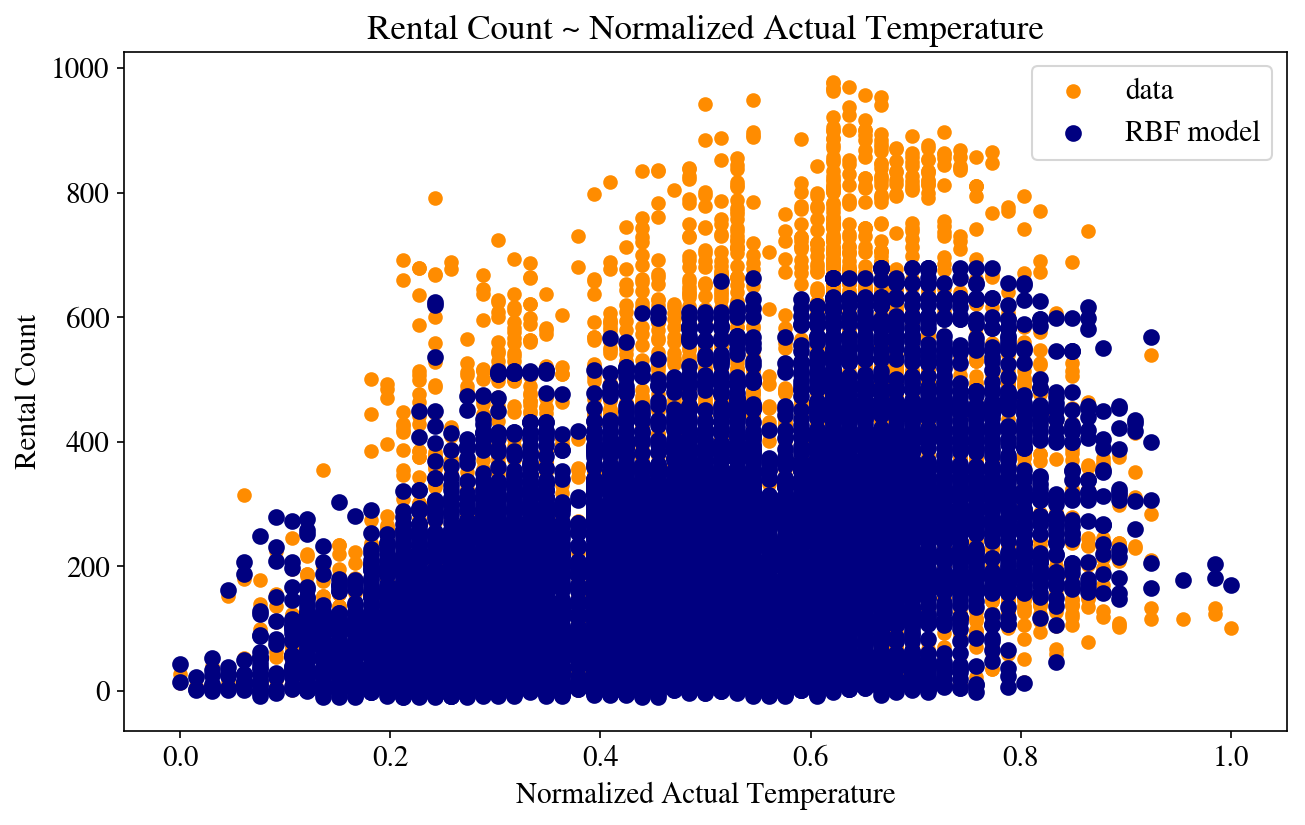

In [34]:
"""Plot: cnt ~ atemp

lst = ['atemp', 'weathersit', 'workingday', 'hr', 'season', 'month_all', 'windspeed']
"""

plot_regression(X_train[:,0], y_train, svr_pred)
plt.xlabel('Normalized Actual Temperature')
plt.ylabel('Rental Count')
plt.title('Rental Count ~ Normalized Actual Temperature')

pylab.savefig('Rental Count ~ Normalized Actual Temperature')
plt.show()

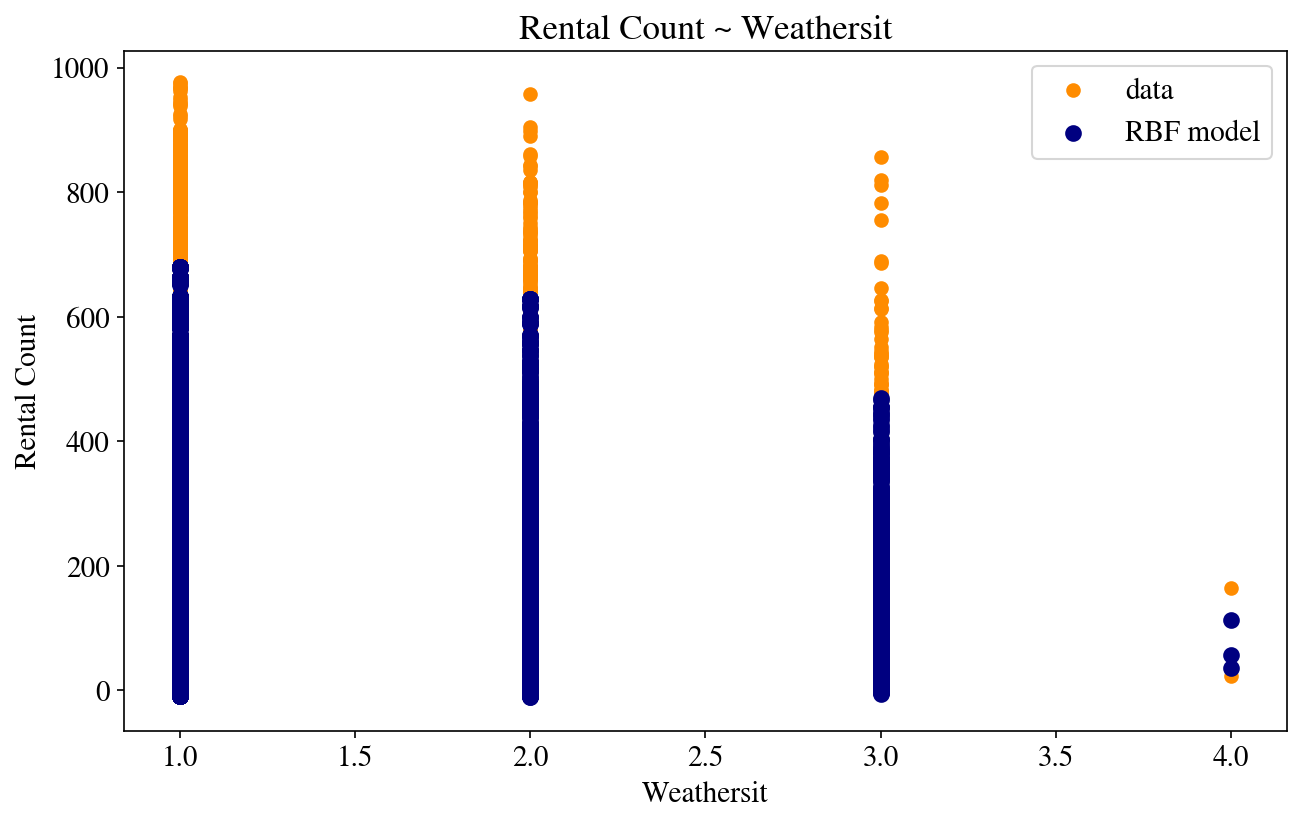

In [35]:
"""Plot: cnt ~ weathersit

lst = ['atemp', 'weathersit', 'workingday', 'hr', 'season', 'month_all', 'windspeed']
"""

plot_regression(X_train[:,1], y_train, svr_pred)
plt.xlabel('Weathersit')
plt.ylabel('Rental Count')
plt.title('Rental Count ~ Weathersit')

pylab.savefig('Rental Count ~ Weathersit')
plt.show()

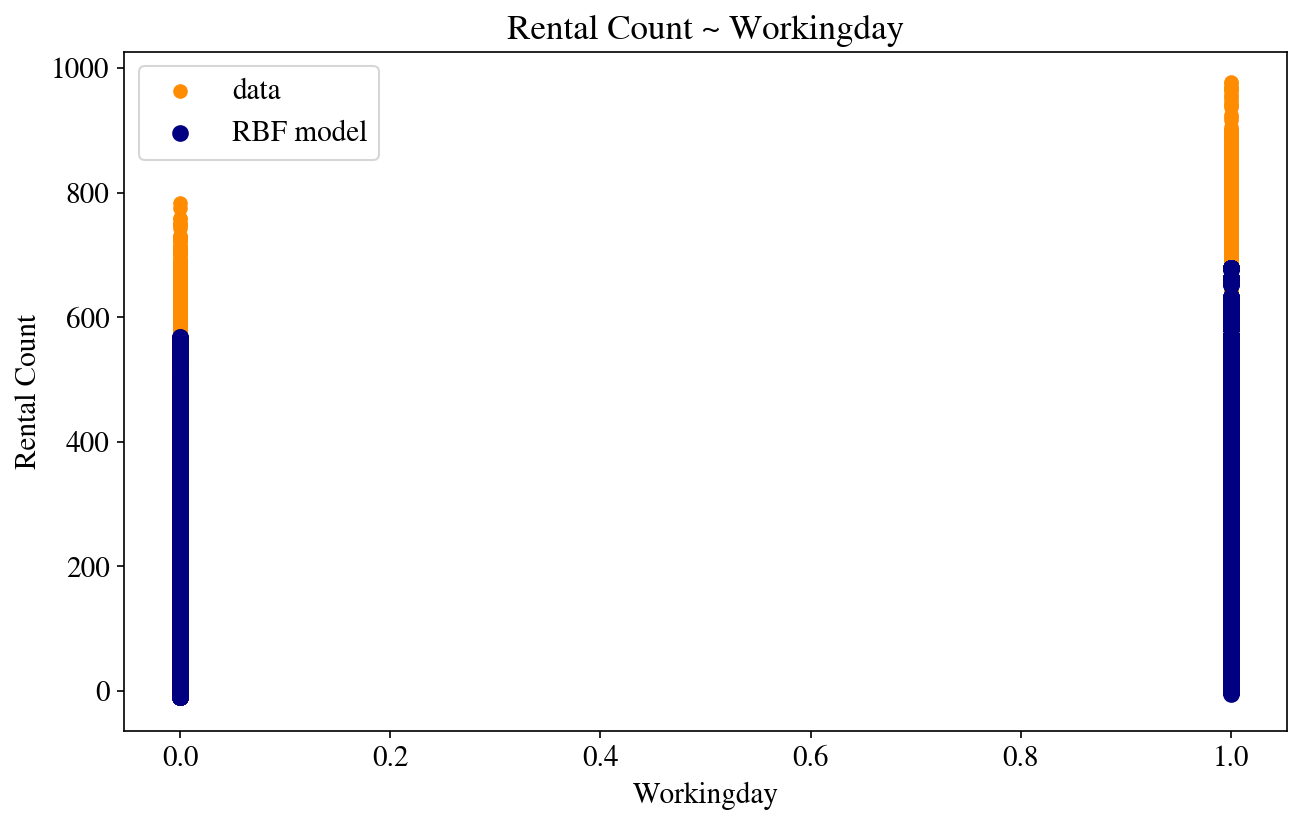

In [37]:
"""Plot: cnt ~ workingday

lst = ['atemp', 'weathersit', 'workingday', 'hr', 'season', 'month_all', 'windspeed']
"""

plot_regression(X_train[:,2], y_train, svr_pred)
plt.xlabel('Workingday')
plt.ylabel('Rental Count')
plt.title('Rental Count ~ Workingday')

pylab.savefig('Rental Count ~ Workingday')
plt.show()

In [43]:
""" One-way ANOVA for to show the statistical significance in the working Vs Non-working

"""
import scipy.stats as stats

workingday = np.array(df["cnt"][df["workingday"] == 1])
non_working = np.array(df["cnt"][df["workingday"] == 0])


print(len(workingday))
print(len(non_working))

stats.f_oneway(workingday, non_working)

11865
5514


F_onewayResult(statistic=15.95182279420313, pvalue=6.5242645470519952e-05)

2794


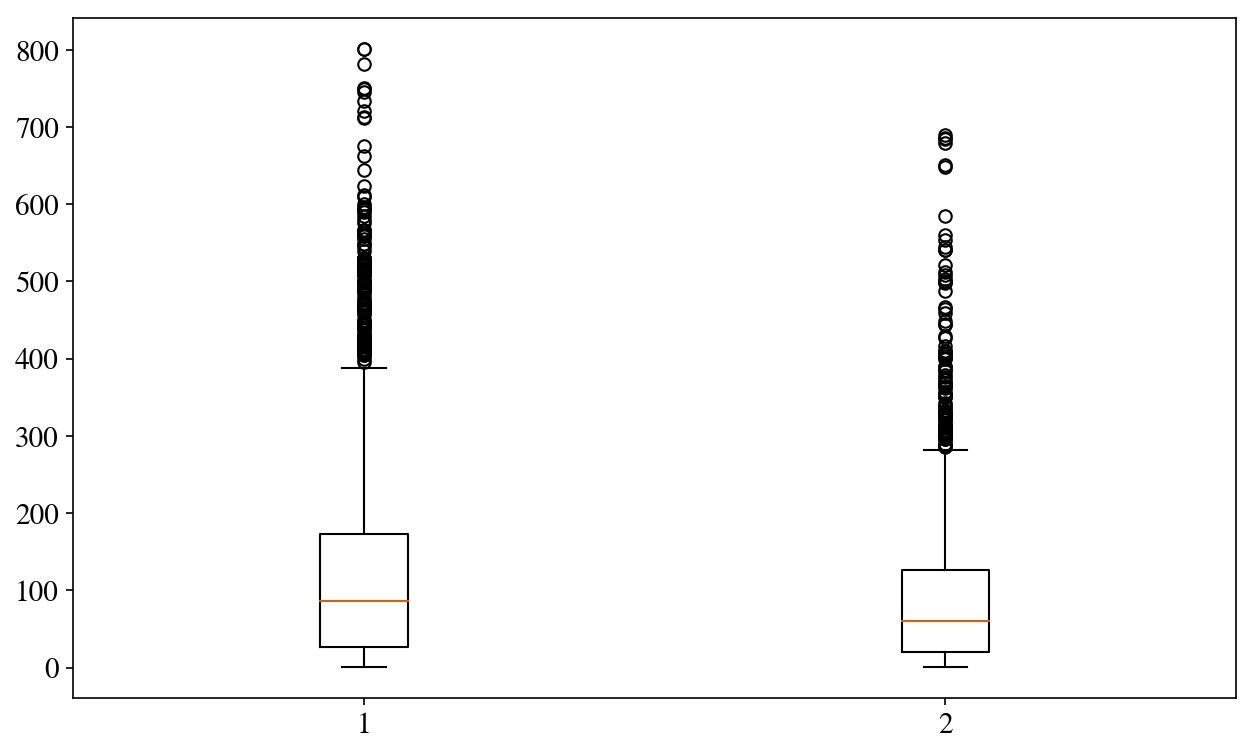

F_onewayResult(statistic=40.106833254405906, pvalue=2.6544452878709776e-10)

In [57]:
"""
Season = 0: Working Vs non-working

"""
workingday_s0 = np.array(df["cnt"][df["workingday"] == 1][df["season"] == 1])
non_working_s0 = np.array(df["cnt"][df["workingday"] == 0][ df["season"] == 1])
print(len(workingday_s0))

data = [workingday_s0, non_working_s0]
plt.boxplot(data)

plt.show()

stats.f_oneway(workingday_s0, non_working_s0)

"""
Concluded that the workingday demand is more inelastic compared to the non-workingday, regardless the wheather/season. 

Suggestion:
"""


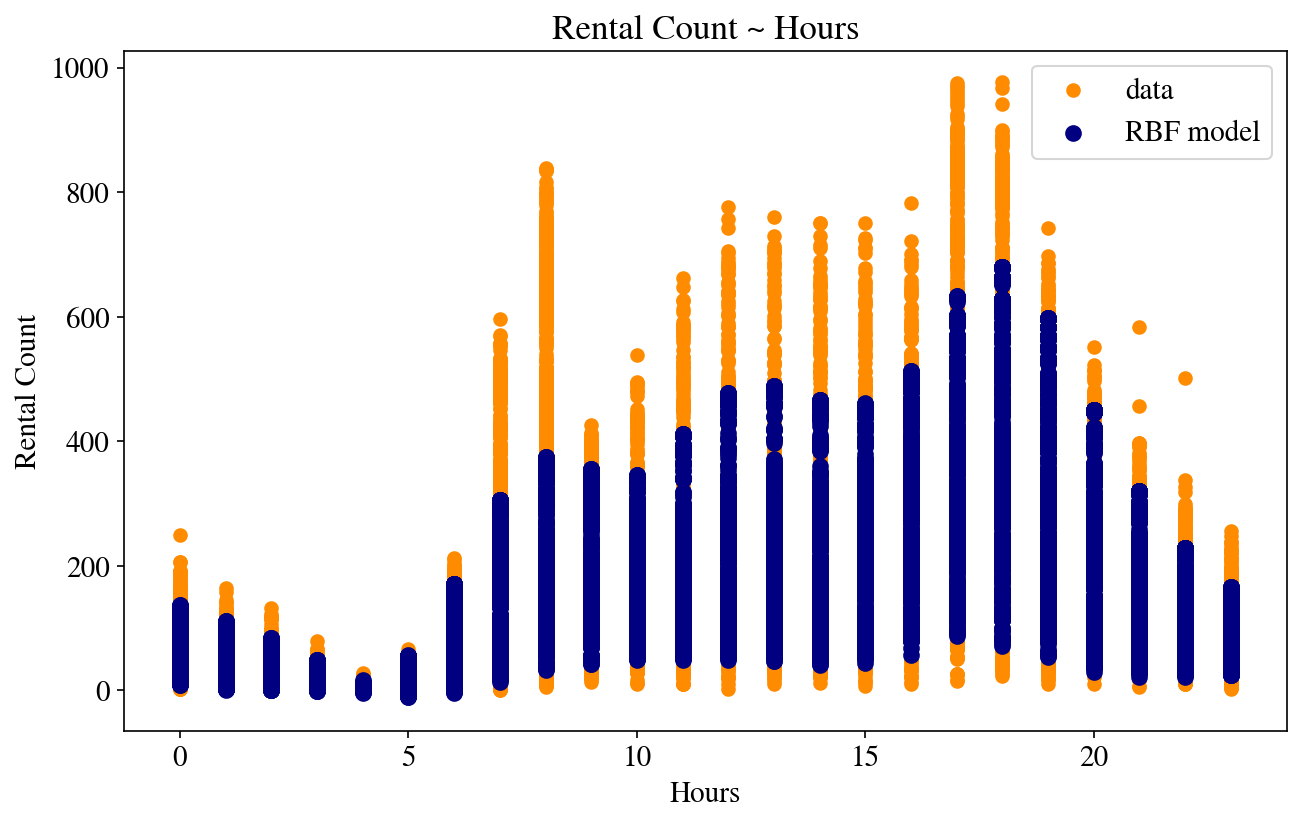

In [38]:
"""
lst = ['atemp', 'weathersit', 'workingday', 'hr', 'season', 'month_all', 'windspeed']

cnt ~ hr
"""

plot_regression(X_train[:,3], y_train, svr_pred)
plt.xlabel('Hours')
plt.ylabel('Rental Count')
plt.title('Rental Count ~ Hours')

pylab.savefig('Rental Count ~ Hours')
plt.show()

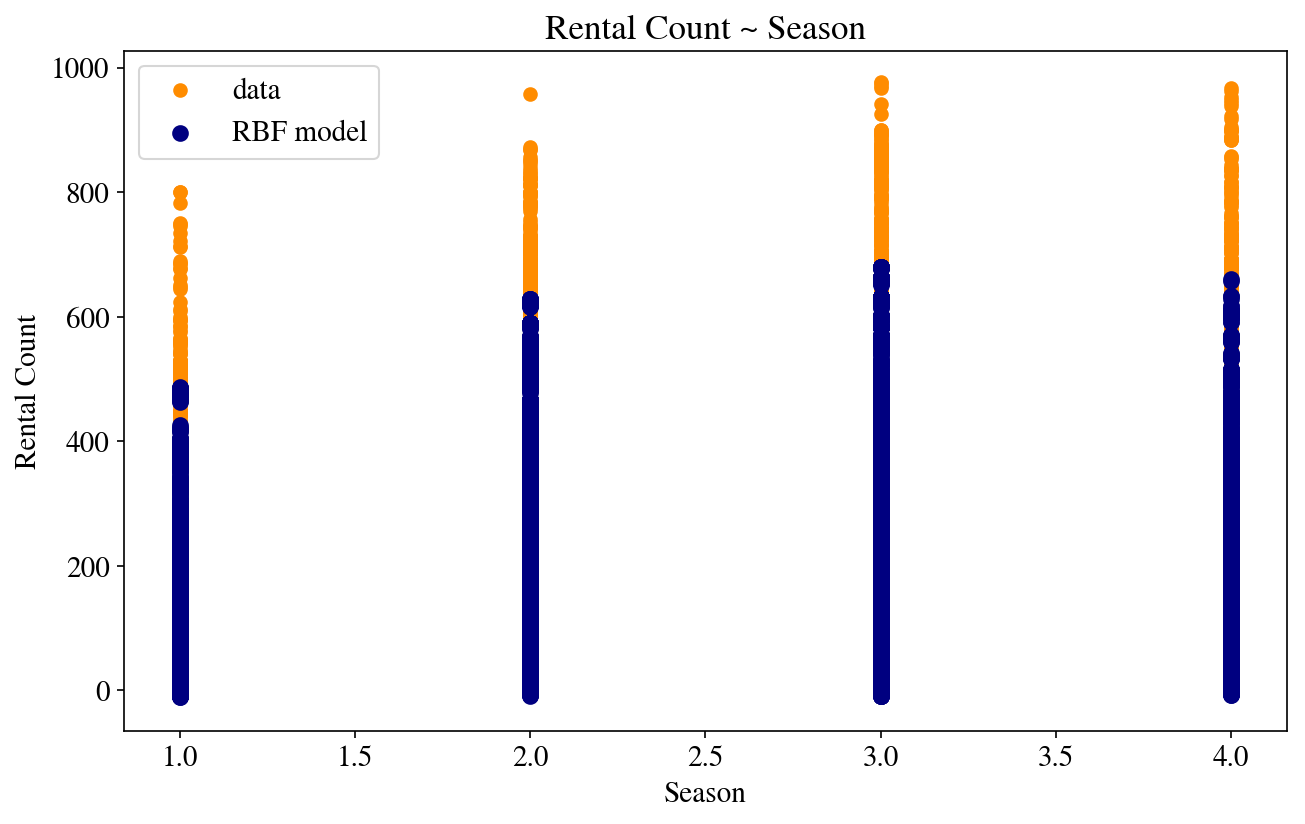

In [39]:
"""
lst = ['atemp', 'weathersit', 'workingday', 'hr', 'season', 'month_all', 'windspeed']

cnt ~ season
"""

plot_regression(X_train[:,4], y_train, svr_pred)
plt.xlabel('Season')
plt.ylabel('Rental Count')
plt.title('Rental Count ~ Season')

pylab.savefig('Rental Count ~ Season')
plt.show()

In [44]:
""" One-way ANOVA for to show the statistical significance in the seasons

"""
import scipy.stats as stats

spring = np.array(df["cnt"][df["season"] == 1])
summer = np.array(df["cnt"][df["season"] == 2])
fall = np.array(df["cnt"][df["season"] == 3])
winter = np.array(df["cnt"][df["season"] == 4])

stats.f_oneway(spring, summer, fall, winter)

F_onewayResult(statistic=409.18103726305247, pvalue=7.4010713997127898e-257)

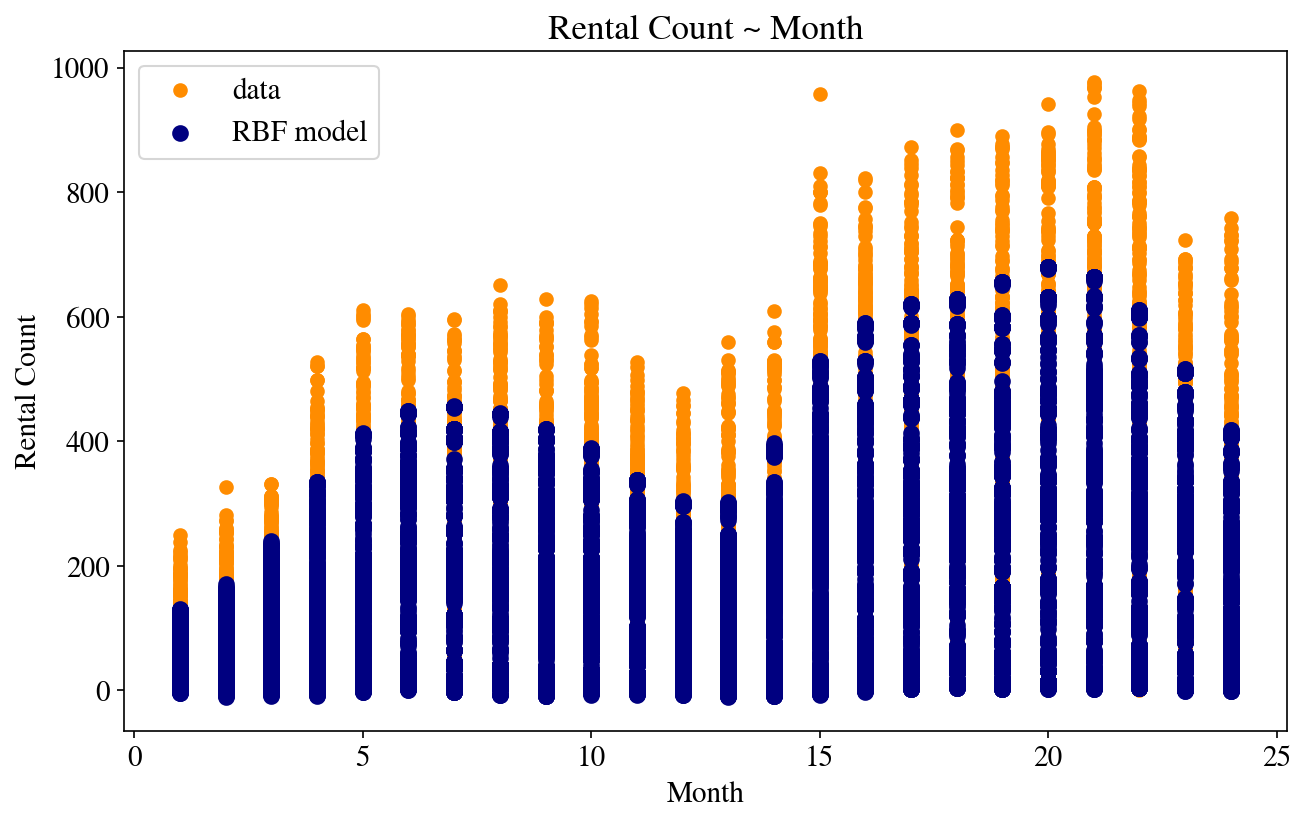

In [40]:
"""
lst = ['atemp', 'weathersit', 'workingday', 'hr', 'season', 'month_all', 'windspeed']

cnt ~ season
"""

plot_regression(X_train[:,5], y_train, svr_pred)
plt.xlabel('Month')
plt.ylabel('Rental Count')
plt.title('Rental Count ~ Month')

pylab.savefig('Rental Count ~ Month')
plt.show()

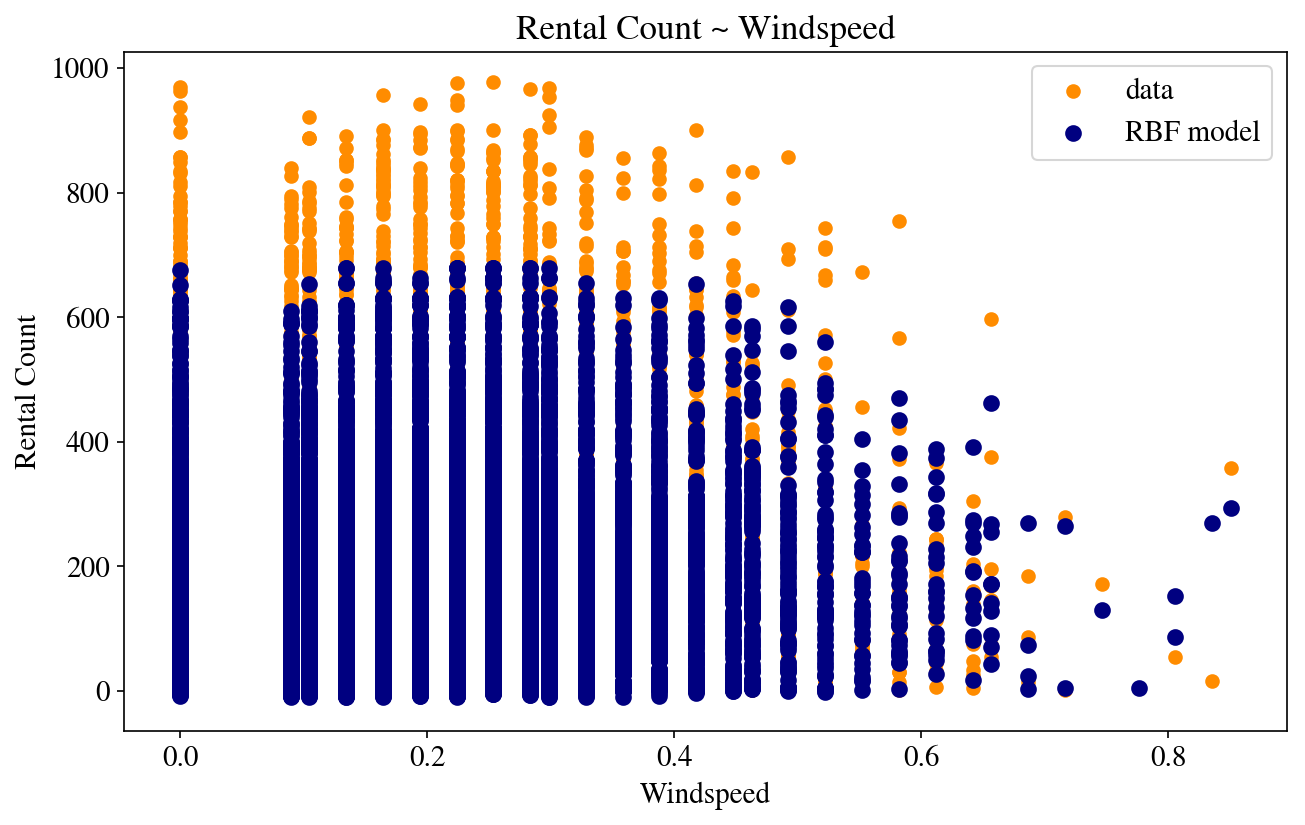

In [41]:
"""Plot: cnt ~ WindSpeed

lst = ['atemp', 'weathersit', 'workingday', 'hr', 'season', 'month_all', 'windspeed']
"""

plot_regression(X_train[:,6], y_train, svr_pred)
plt.xlabel('Windspeed')
plt.ylabel('Rental Count')
plt.title('Rental Count ~ Windspeed')

pylab.savefig('Rental Count ~ Windspeed')
plt.show()

In [168]:
""" Run the model again with "cnt" outliers taken out - 1: taking out the outliers

"""

outliers_mad(df["cnt"])

def Nan(df):
    if df['MAD'] > 3.5:
        return None
    else:
        return df['MAD']

# create sex_new 
df['MAD_Drop']=df.apply(Nan,axis=1)
print(df['MAD_Drop'].isnull().any())
#df['MAD_Drop'].head(12)
df.dropna(subset = ['MAD_Drop'], inplace = True)
print(df.shape)

Index(['season', 'yr', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'month_all', 'MAD'], dtype='object')
True
(17112, 15)


In [40]:
""" Run the model again:

"""

lst = ['atemp', 'weathersit', 'workingday', 'hr', 'season', 'month_all', 'windspeed']
X = df.as_matrix(columns=lst)
y = np.array(df["cnt"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=20)

svr = SVR(kernel = "rbf", C = 10, gamma = 0.1) 
svr_fit = svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_train)
svr_pred_test = svr.predict(X_test) 
rmse = metrics.mean_squared_error(y_test, svr_pred_test)

print("RMSE - {}".format(rmse))
r2 = metrics.r2_score(y_test, svr_pred_test)
print("R2 - {}".format(r2))
print()


RMSE - 5848.039052859611
R2 - 0.7866883989188811



In [173]:
from tkinter import *
import tkinter.messagebox as ms

def predict():
    lst = np.array([float(entry1.get()), float(entry2.get()), float(entry3.get()), float(entry4.get()), 
                    float(entry5.get()), float(entry6.get()), float(entry7.get())]).reshape(1, -1)
    cnt = svr.predict(lst)
    print("Predicted Count: \n{}".format(np.round(cnt, decimals=0)))
    ms.showinfo("Prediction Window","Predicted Count: \n{}".format(np.round(cnt, decimals=0)))
    
root = Tk()

l1 = Label(root, text="Actual Temp", fg = "red")
entry1 = Entry(root)
l2 = Label(root, text="Weather", fg = "blue")
entry2 = Entry(root)
l3 = Label(root, text="Working", fg = "purple")
entry3 = Entry(root)
l4 = Label(root, text="Hour", fg = "green")
entry4 = Entry(root)
l5 = Label(root, text="Season", fg = "salmon")
entry5 = Entry(root)
l6 = Label(root, text="Month", fg = "black")
entry6 = Entry(root)
l7 = Label(root, text="Windspeed", fg = "gray")
entry7 = Entry(root)


l1.grid(row = 0, sticky = E)
l2.grid(row = 1, sticky = E)
l3.grid(row = 2, sticky = E)
l4.grid(row = 3, sticky = E)
l5.grid(row = 4, sticky = E)
l6.grid(row = 5, sticky = E)
l7.grid(row = 6, sticky = E)

entry1.grid(row = 0, column = 1)
entry2.grid(row = 1, column = 1)
entry3.grid(row = 2, column = 1)
entry4.grid(row = 3, column = 1)
entry5.grid(row = 4, column = 1)
entry6.grid(row = 5, column = 1)
entry7.grid(row = 6, column = 1)

c = Checkbutton(root, text = "I swear these are resonable")
c.grid(columnspan = 2)

button = Button(root, text = "Predict", command = predict)
button.grid(columnspan = 2)

root.mainloop()

Predicted Count: 
[ 128.]
